In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sb

diabetic_data = pd.read_csv('diabetic_data.csv')
#'''Use the below datasets create any four visualization summarizing the datasets...
#Remember to label and have legends for your graphs. 
#Add comments to describe what you are trying to graph'''

In [13]:
#Gaining familiarity with the size and scope of the dataset.
#diabetic_data.shape
#diabetic_data.columns
#diabetic_data.head

<AxesSubplot: xlabel='gender', ylabel='count'>

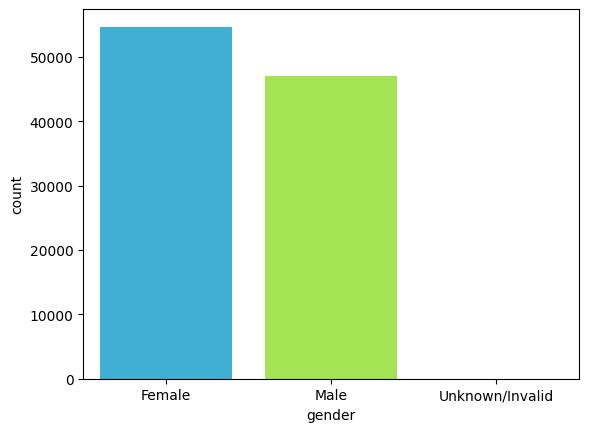

In [43]:
#First Visualization - Count Plots
#I want to visualize the difference between various categories in this data set.
#I will use Seaborn's countplot function
#I set the x-axis to a named category in the data set
#I set the data to the newly imported diabetic data.
sb.countplot(x='gender',data=diabetic_data,palette='turbo')

<AxesSubplot: xlabel='count', ylabel='age'>

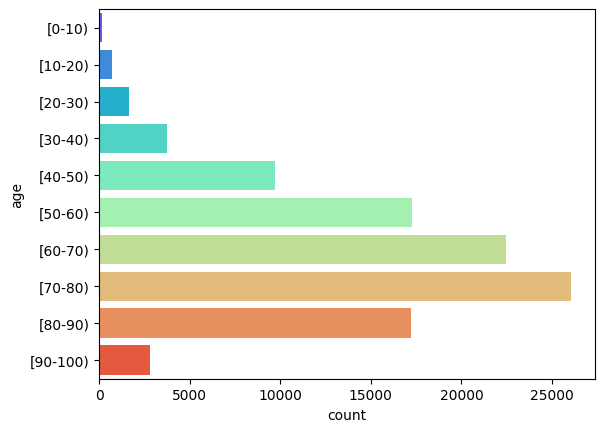

In [44]:
#First visualization - Count Plot continued
sb.countplot(y='age',data=diabetic_data,palette='rainbow')

<AxesSubplot: xlabel='race', ylabel='count'>

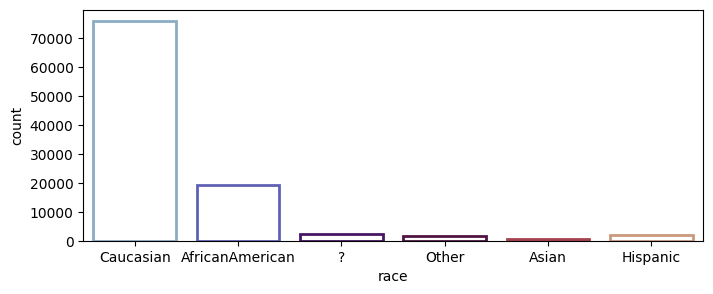

In [78]:
#First visualization - Count Plot continued
#"Caucasian" and "AfricanAmerican" labels were too close together.
plt.figure(figsize =(8,3))
sb.countplot(x='race',data=diabetic_data,palette='twilight',
            facecolor = (0,0,0,0),
            linewidth = 2,
            edgecolor = sb.color_palette('twilight'))

<AxesSubplot: xlabel='race', ylabel='count'>

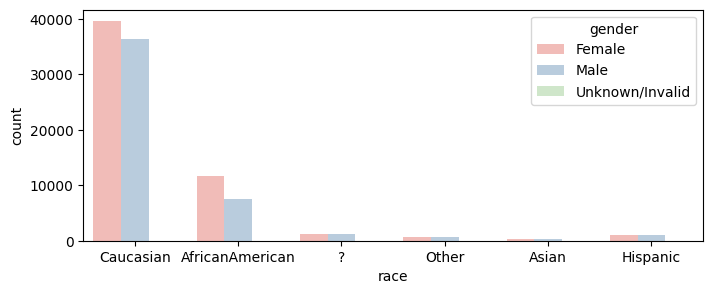

In [74]:
#First visualization - Count Plot continued
#"Caucasian" and "AfricanAmerican" labels were too close together.
#Comparing genders across race
plt.figure(figsize =(8,3))
sb.countplot(x='race',hue='gender',data=diabetic_data,
             palette='Pastel1')

In [ ]:
#Second Visualization - 